In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import os,sys,inspect
# sys.path.insert(0,"..")

In [3]:
import numpy as np
import cv2
from PIL import Image
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, utils
from torch.autograd import Variable
import matplotlib.pyplot as plt

torch.manual_seed(0)

if torch.cuda.is_available():
    torch.backends.cudnn.deterministic = True

# Device
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(DEVICE)


data_folder = 'datasets/ISIC2018'
model_path = 'logs/resunet.pth'

cuda:0


In [4]:
from dataset import ISIC2018_dataloader

test_dataset = ISIC2018_dataloader("datasets/ISIC2018", is_train=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=8)

In [5]:
from model import * 
model = build_resunet()
checkpoint = torch.load(model_path)
model.load_state_dict(checkpoint)
model = model.to(DEVICE)
model.eval()

build_resunet(
  (model): ResUnetSkipConnectionBlock(
    (model): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): ReLU(inplace=True)
      (2): ResidualBlock(
        (relu): ReLU(inplace=True)
        (block): Sequential(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (3): ResidualBlock(
        (relu): ReLU(inplace=True)
        (block): Sequential(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       

In [6]:
def visualize(idx, **images):
    """Plot images in one row.""" 
    n = len(images)
    fig = plt.figure(figsize=(20, 10))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).lower(), fontsize=20)
        plt.imshow(image, cmap='gray')
        plt.axis("off")
        #plt.tight_layout()
    #plt.savefig("../outputs/vis/compare-segs/{}.png".format(idx), facecolor="white", bbox_inches = 'tight')
    plt.show()

In [7]:
len(test_dataloader)
# y[y==1] = 255

519

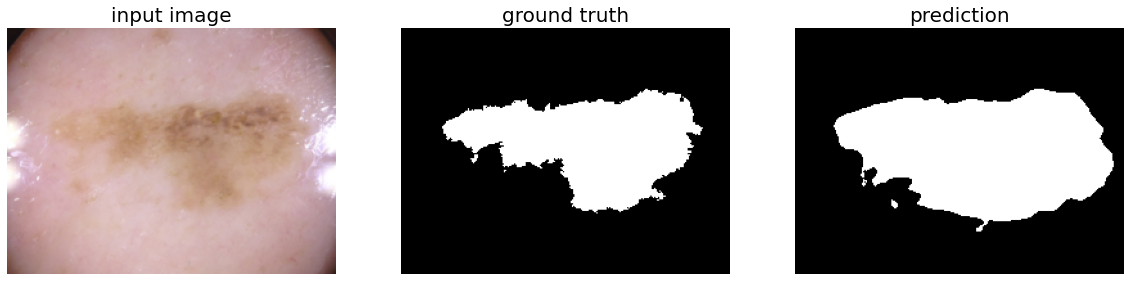

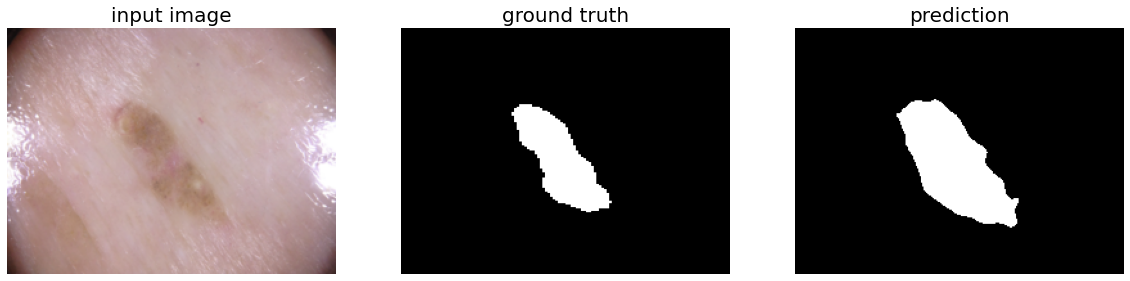

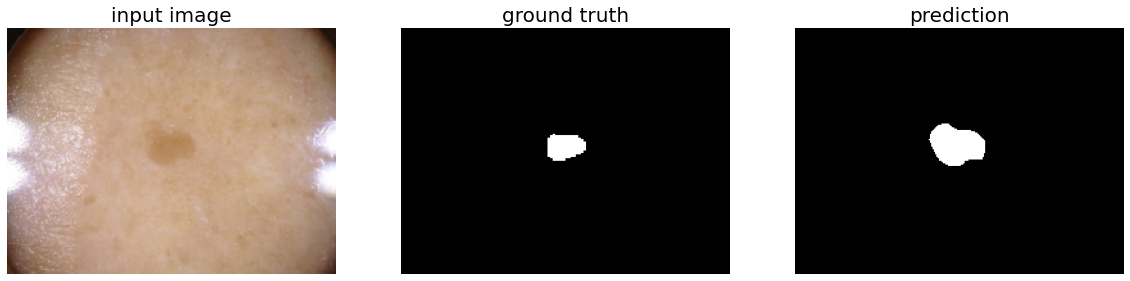

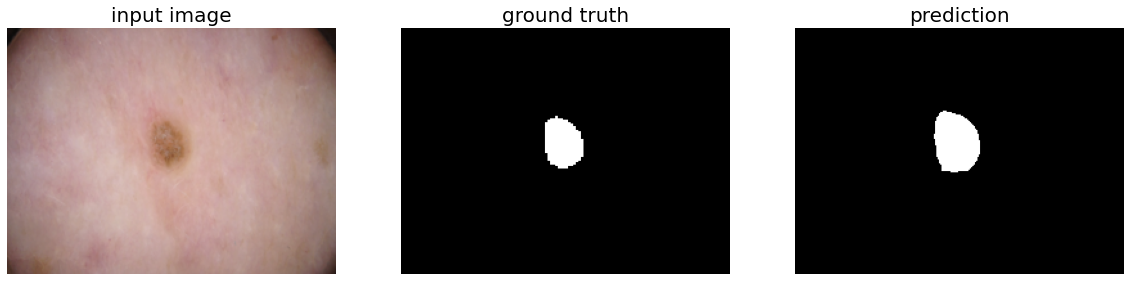

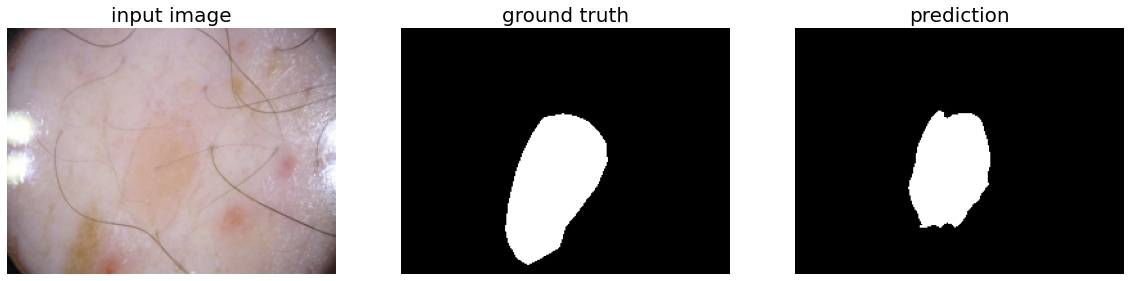

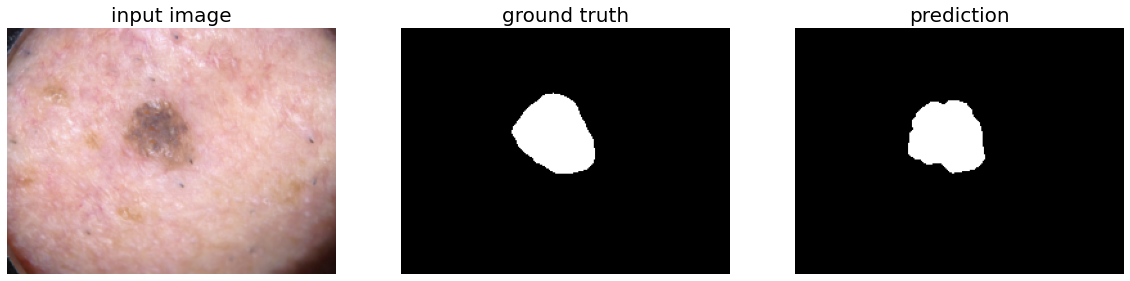

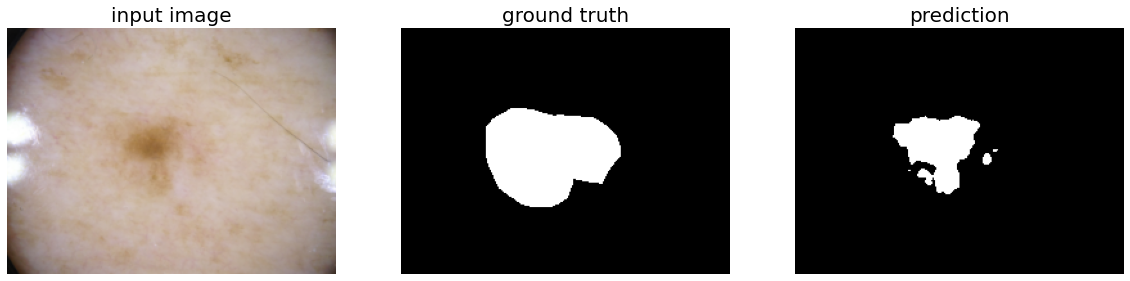

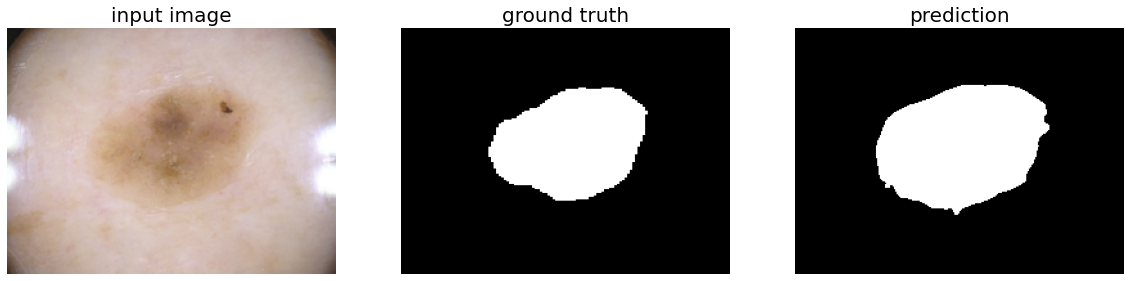

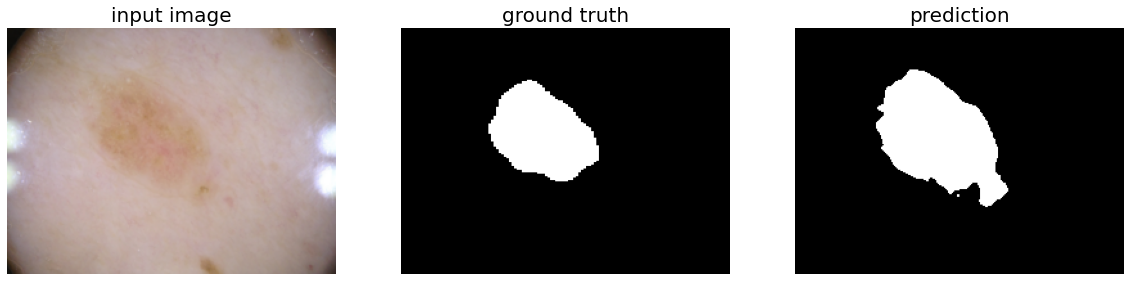

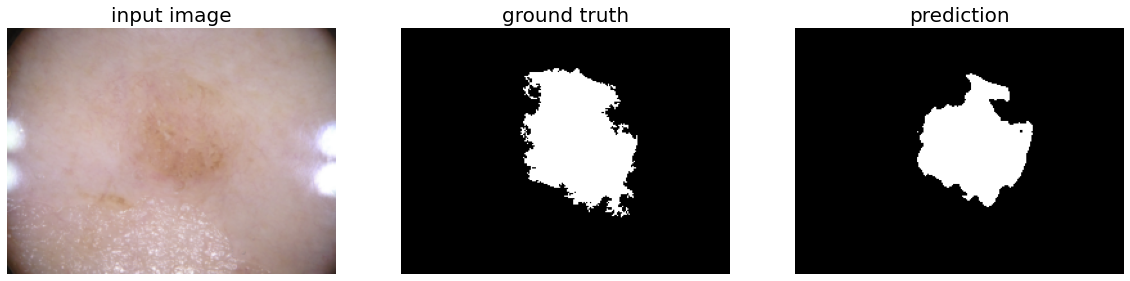

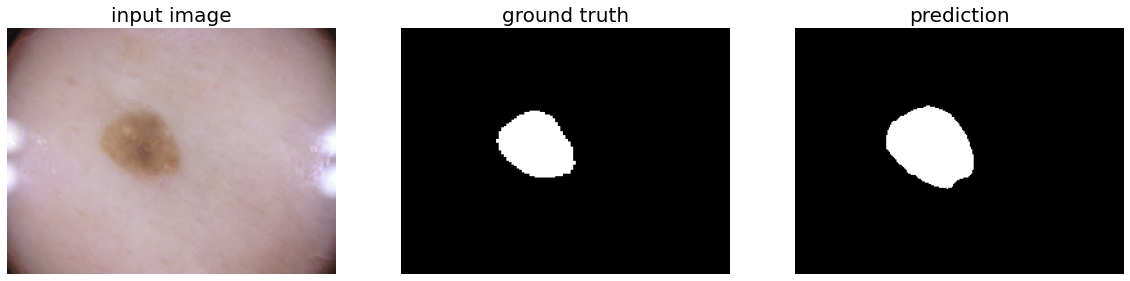

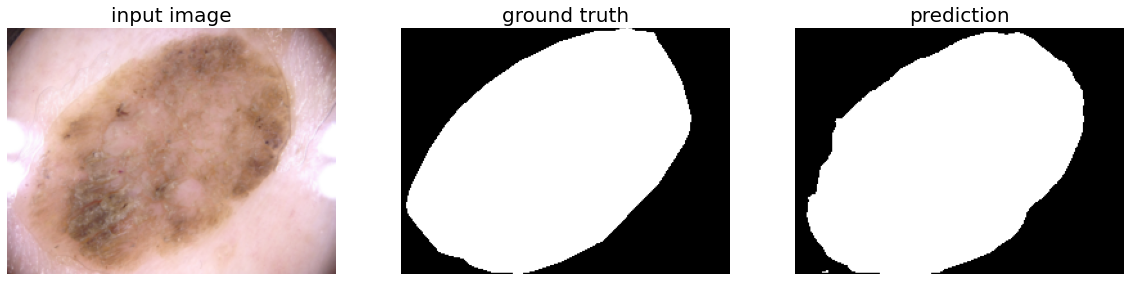

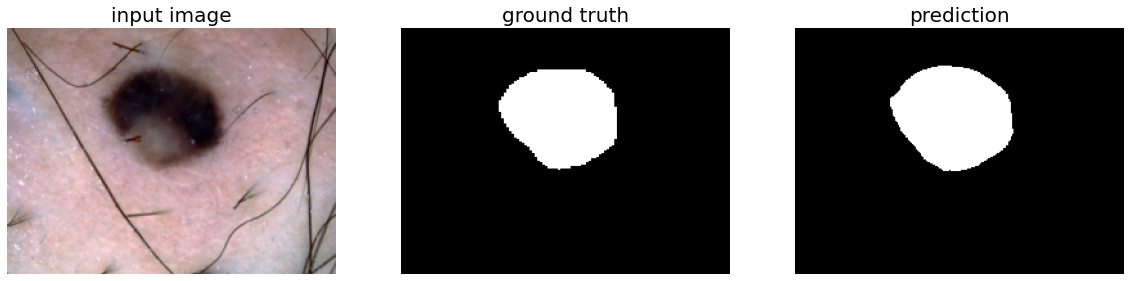

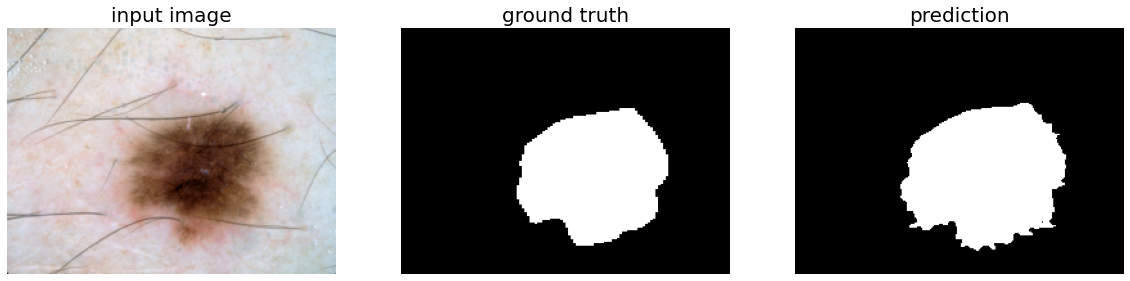

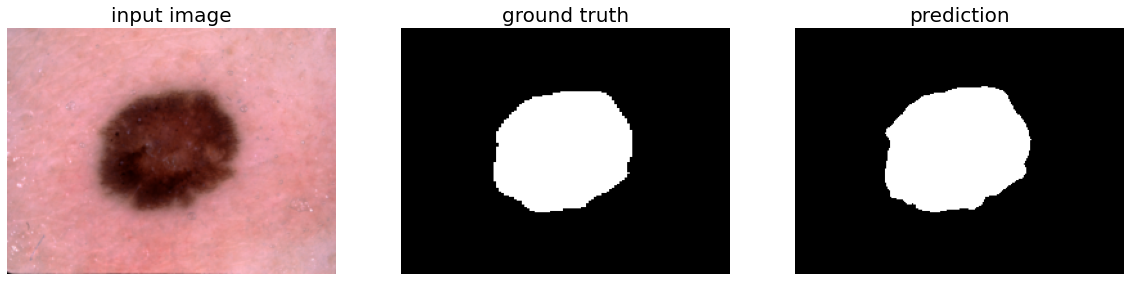

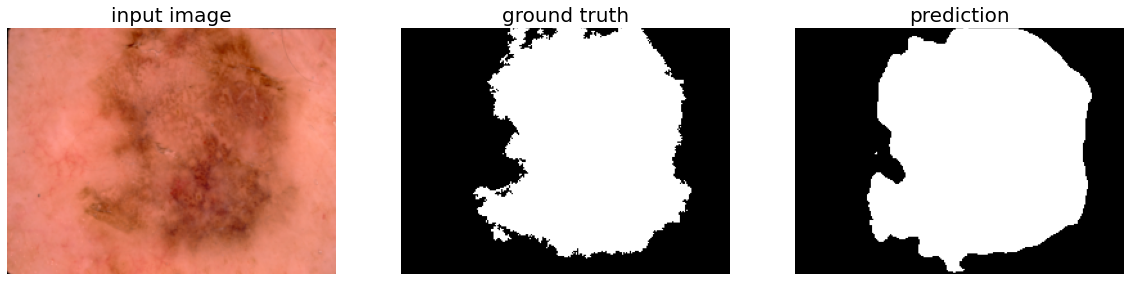

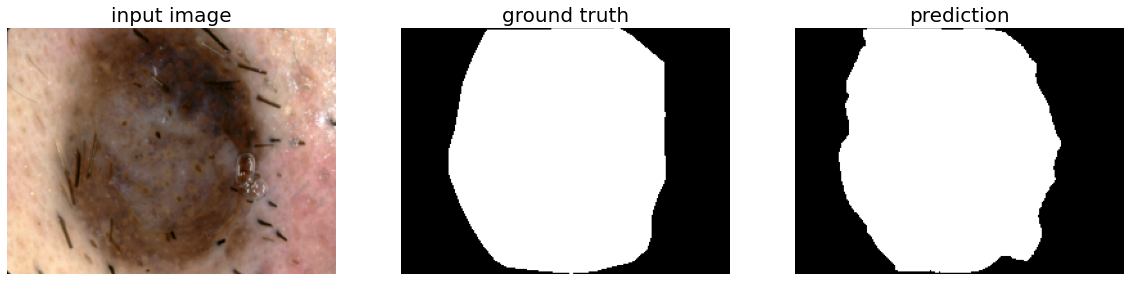

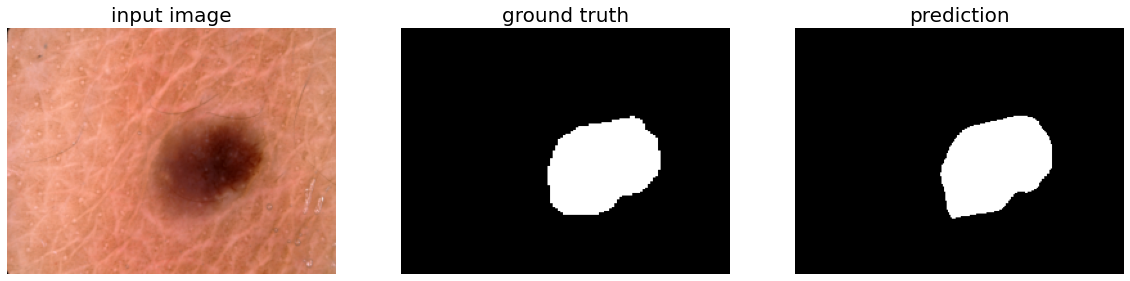

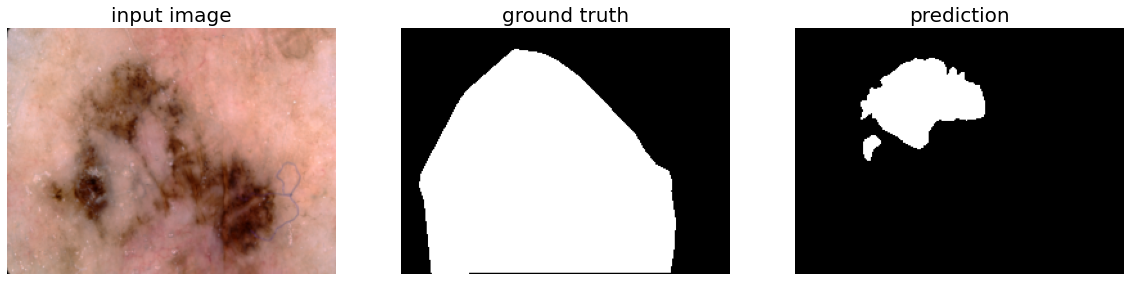

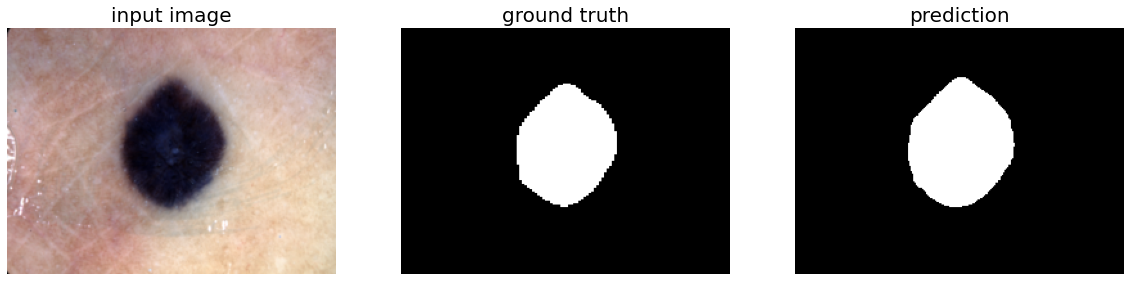

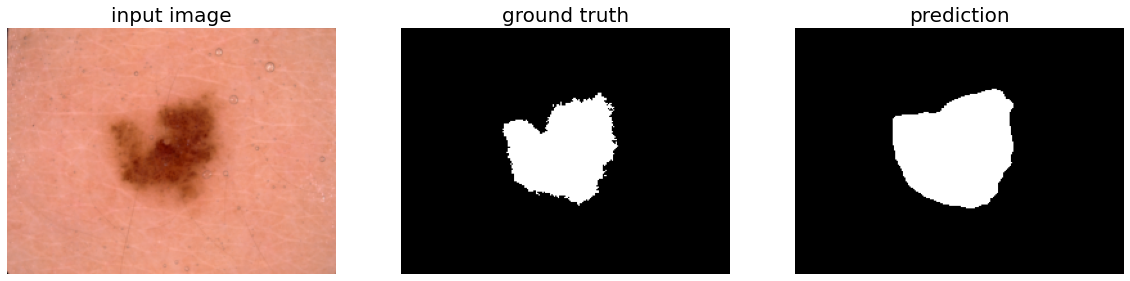

In [8]:
for batch_idx, data in enumerate(test_dataloader):
    img, target = data["image"].to(DEVICE), data["mask"].to(DEVICE)
    output = torch.sigmoid(model(img.float()))
    
    img = (img[0].permute(1,2,0).detach().cpu().numpy()+1)/2
    img = (img*255).astype(np.uint8)

    gt = target.permute(0, 2, 3, 1).squeeze().detach().cpu().numpy()
    pred = output.permute(0, 2, 3, 1).squeeze().detach().cpu().numpy() > 0.5
    
    visualize(batch_idx, input_image=img, ground_truth=gt, prediction=pred)
    
    if batch_idx == 20:
        break